### Nachiket Deshpande

Data Science and Business Analytics Intern

Task 1: Prediction using Supervised ML

Problem Statement: Predict the percentage score of a student based on the no. of study hours.

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#To import the data:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.dropna(inplace=True)  #To drop empty rows
data.head(5) #Displaying a sample of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking the Correlation between the variables

Representing the correlation using heatmap

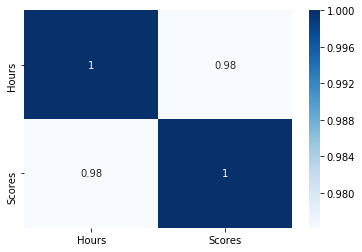

In [3]:
#Observing the relationship between no of hours studied and score percentage using correlation
correlation_matrix = data.corr()
correlation_matrix
sns.heatmap(data=correlation_matrix, cmap="Blues", annot=True)
plt.show()

Plotting the data points to identify the relationship between variables

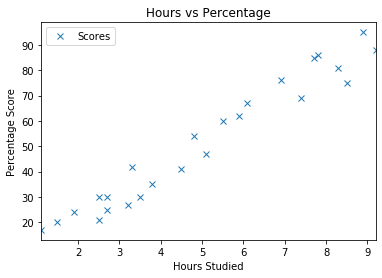

In [4]:
# Plotting
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can identify a positive linear relationship between scores and hours studied

## Creating the prediction model

We divide the dataset into attributes and labels to X and y respectively

Splitting the dataset : 80% for training and 20% for testing

Training the dataset using LinearRegression()

Plotting the regression line

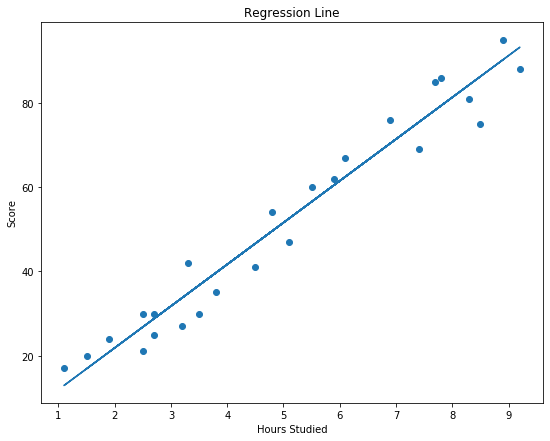

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

#Splitting the dataset for training and testing of model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

# Plotting the regression line
regline = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(9,7))
plt.scatter(X, y)
plt.plot(X, regline);
plt.title("Regression Line")
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

## Predicting the values and comparing

Predicting the values in testing dataset

In [6]:
#Using model to make predictions
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
df

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Testing the model

Testing the model with the value provided in the problem statement

In [7]:
hour = 9.25 #Provided Value
h = np.array(hour) # convert to a numpy array
h= h.reshape(1, -1)
prediction = regressor.predict(h)
print("Number of Hours = {}".format(hour))
print("Predicted Score = {}".format(prediction[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

Finding out the metric values of prediction model - mean absolute error, root mean square error and R-square

In [8]:
# MODEL EVALUATION
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse = (mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:",mse)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Square Error:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

Mean Absolute Error: 4.183859899002975
Root Mean Square Error: 4.6474476121003665
R-Square: 0.9454906892105356


Conclusion:From the R-Square value we can identify a 94% accuracy for our prediction model